In [6]:
import torch 
import pandas as pd 

## 使用不同的类别柱状图证明，raw， cam， multiscale， cam + ms分别针对不同的类别得到更好的效果。

          classes     BASIC           +CF       +MS        +CF&MS
16            sky  0.403855  5.350475e-01  0.509118  5.791032e-01
19            car  0.245526  4.650682e-01  0.177252  5.141925e-01
0            road  0.153614  3.889181e-01  0.151861  4.191096e-01
14     vegetation  0.140581  2.580147e-01  0.295911  2.558202e-01
17         person  0.132186  2.220066e-01  0.171953  2.181023e-01
4        building  0.268155  2.196673e-01  0.277375  2.168586e-01
26        bicycle  0.077611  1.881086e-01  0.026276  1.811970e-01
1        sidewalk  0.093525  1.232793e-01  0.029243  1.133351e-01
13   traffic sign  0.028012  9.147452e-02  0.030579  9.379587e-02
15        terrain  0.008010  2.578987e-02  0.106308  7.524727e-02
2         parking  0.024071  4.631242e-02  0.001245  5.625714e-02
10           pole  0.034616  4.194233e-02  0.030529  5.376953e-02
12  traffic light  0.003785  2.669986e-03  0.001409  3.828678e-02
21            bus  0.000813  2.060978e-03  0.000104  2.928602e-02
6         

<AxesSubplot:xlabel='classes'>

<Figure size 2400x1600 with 0 Axes>

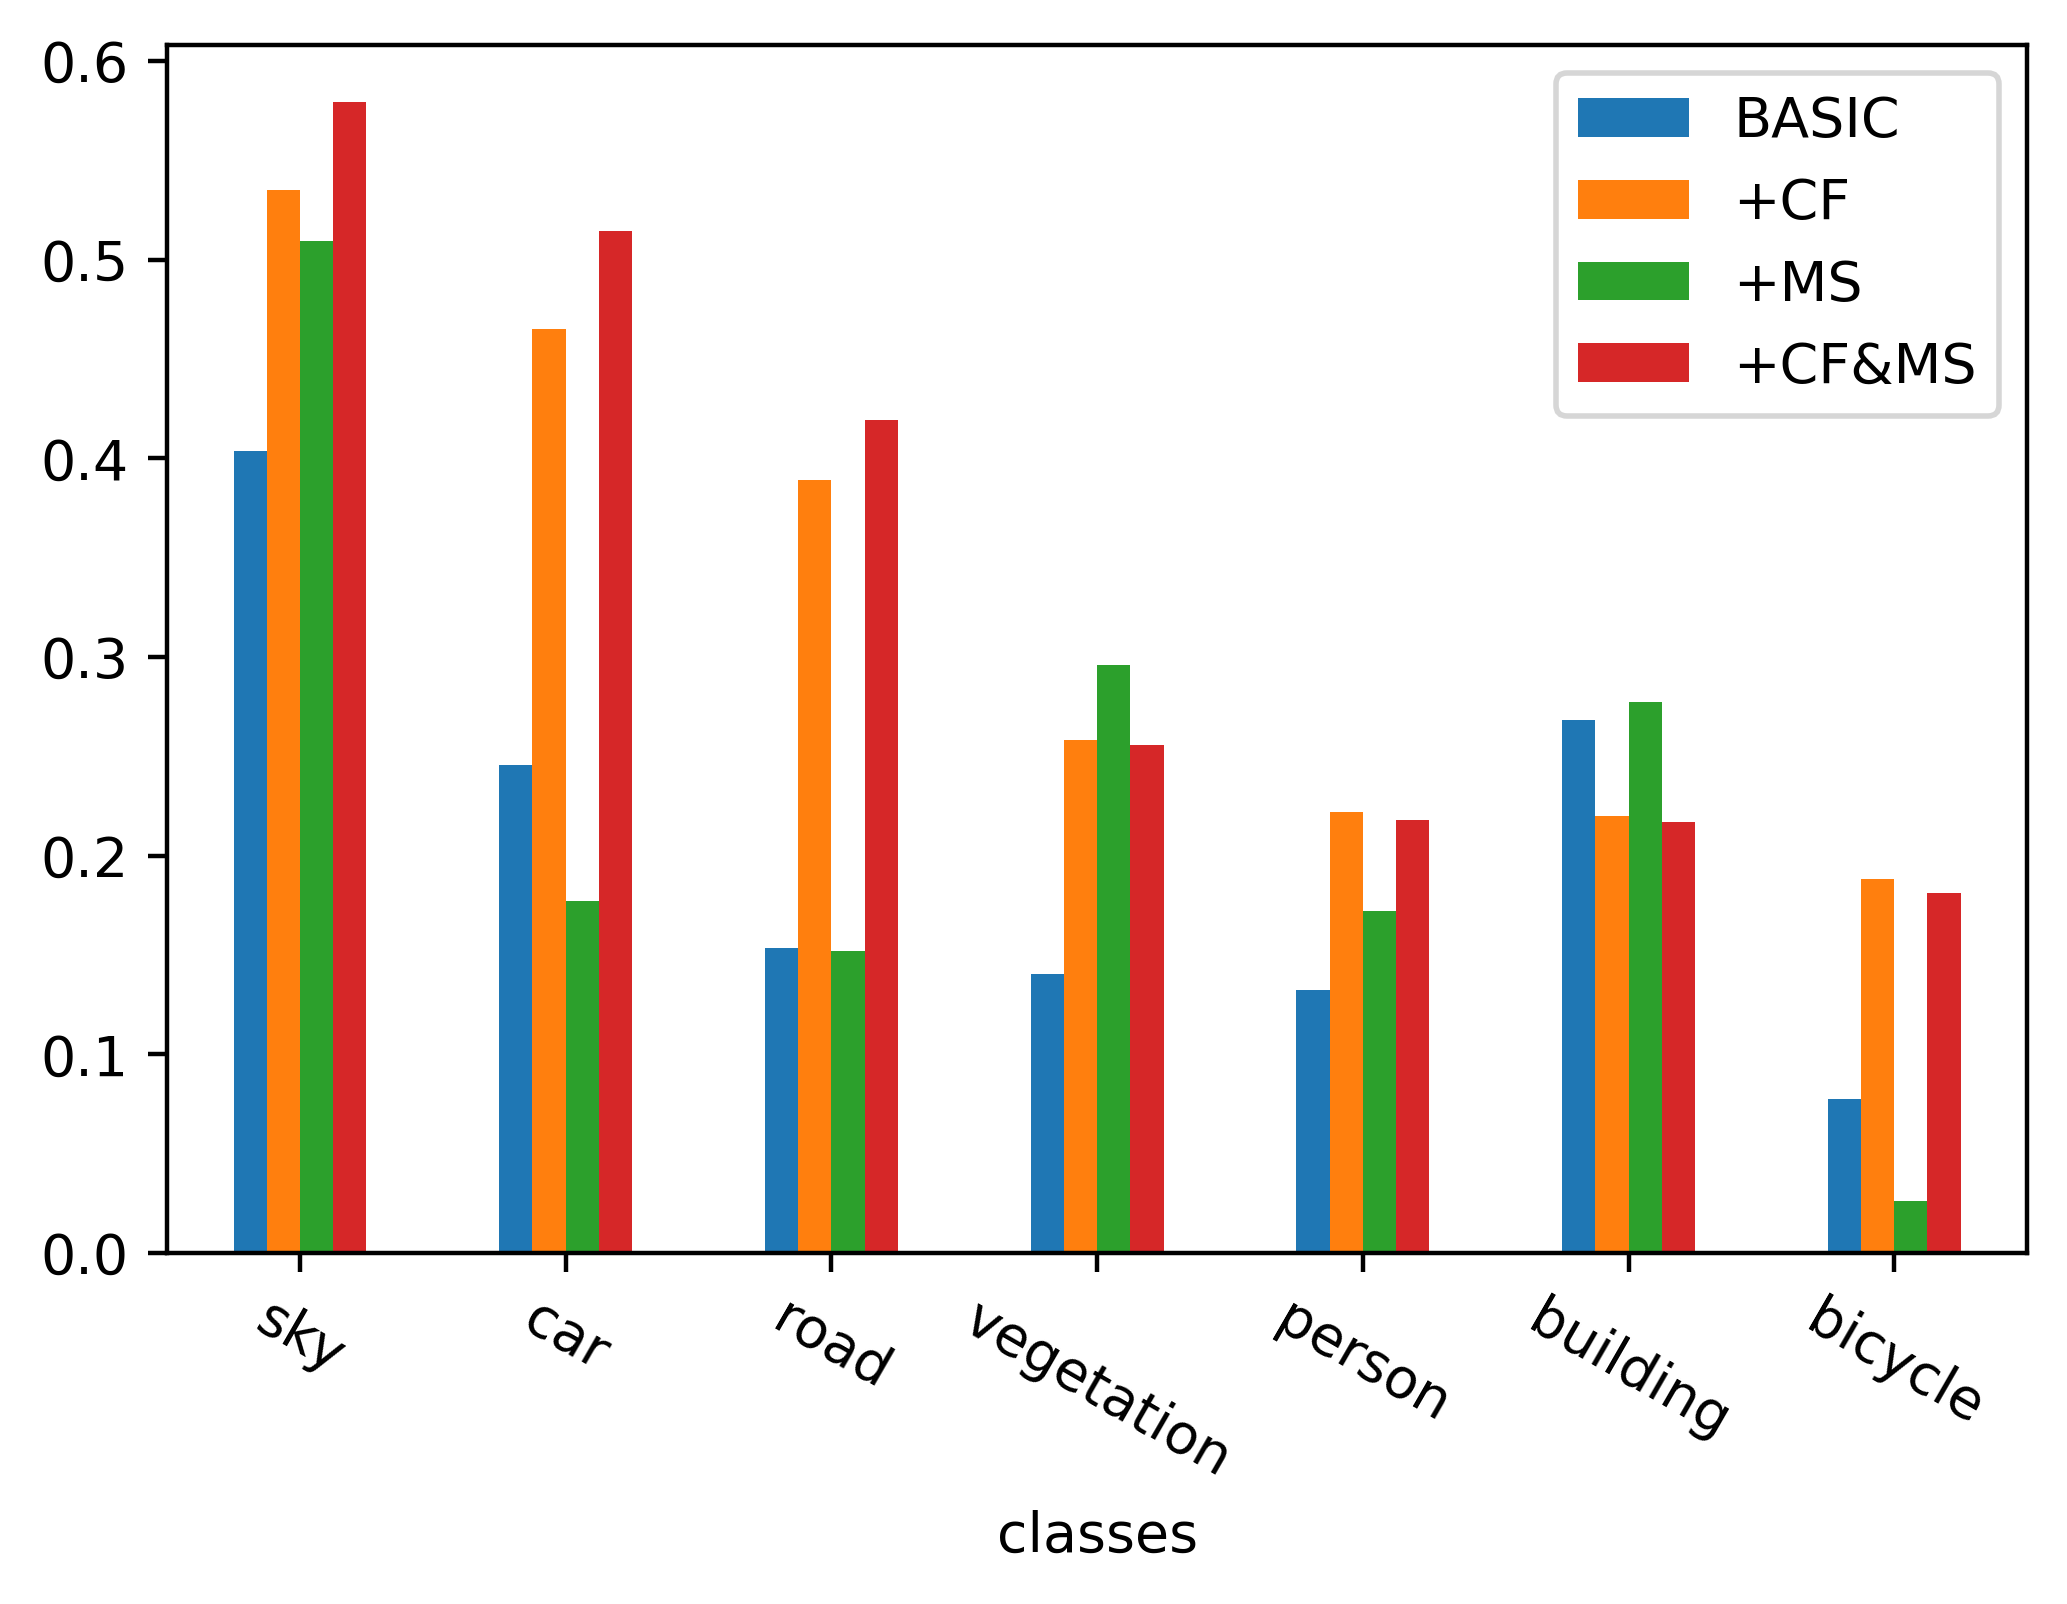

In [29]:
from matplotlib import pyplot as plt


plt.rcParams["figure.dpi"] = 400
# paths = {
# 'raw_path': '/home/zhulifu/unsup_seg/trials_unsupervised_segmentation/gen_files/resnet18_320_hist.pth',
# 'cam_path': '/home/zhulifu/unsup_seg/trials_unsupervised_segmentation/gen_files/resnet50_320_cam_multiscalehist.pth',
# 'ms_path':  '/home/zhulifu/unsup_seg/trials_unsupervised_segmentation/gen_files/resnet18_320_multiscalehist.pth',
# 'camms_path': '/home/zhulifu/unsup_seg/trials_unsupervised_segmentation/gen_files/resnet50_320_multiscalehist.pth'
# }
labels = ['BASIC', "+CF", "+MS", "+CF&MS"]
paths = {
    labels[0] + '_path': '/home/zhulifu/unsup_seg/trials_unsupervised_segmentation/gen_files/resnet18_320_hist.pth',
    labels[1] + '_path': '/home/zhulifu/unsup_seg/trials_unsupervised_segmentation/gen_files/resnet18_320_multiscalehist.pth',
    labels[2] + '_path' : '/home/zhulifu/unsup_seg/trials_unsupervised_segmentation/gen_files/resnet50_320_camhist.pth',
    labels[3] +'_path':'/home/zhulifu/unsup_seg/trials_unsupervised_segmentation/gen_files/resnet50_320_multiscalehist.pth'
}
dic = {
    "classes": [
            'road', 'sidewalk', 'parking', 'rail track', 'building',
            'wall', 'fence', 'guard rail', 'bridge', 'tunnel',
            'pole', 'polegroup', 'traffic light', 'traffic sign', 'vegetation',
            'terrain', 'sky', 'person', 'rider', 'car',
            'truck', 'bus', 'caravan', 'trailer', 'train',
            'motorcycle', 'bicycle'
            # , 'unknown'
            ],
}
for key in labels:
    histogram = torch.load(paths[key + '_path'])
    tp = torch.diag(histogram)
    fp = torch.sum(histogram, dim=0) - tp
    fn = torch.sum(histogram, dim=1) - tp

    iou = tp / (tp + fp + fn)
    prc = tp / (tp + fn)
    dic[key] = iou

f = pd.DataFrame(dic)
f = f.sort_values(by='+CF&MS', ascending=False)
print(f )
plt.tight_layout()
f[:7].plot.bar(x='classes', rot=-30)

